In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import wrds
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Database
raw = pd.read_excel('7FactorsFungHsieh.xlsx', header=0)
data = raw
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data

,Date,HF Index,PTFS Bonds,PTFS Fx,PTFS Com,10YR,S&P500,Equity Spread,Bond Spread,Year,Month
0,2000-01-01,0.014794,0.1499,0.0933,-0.0835,0.035659,-0.020108,0.184306,-0.028902,2000,1
1,2000-02-01,0.054167,-0.0800,0.0679,0.0412,-0.038922,0.096720,-0.163570,0.136905,2000,2
2,2000-03-01,0.015980,0.2121,-0.0270,-0.0733,-0.060748,-0.030796,-0.030122,0.204188,2000,3
3,2000-04-01,-0.012440,-0.0559,0.0382,-0.1063,0.033167,-0.021915,-0.037483,0.017391,2000,4
4,2000-05-01,0.002077,-0.0371,0.0427,-0.0555,0.009631,0.023934,0.062273,0.076923,2000,5
...,...,...,...,...,...,...,...,...,...,...,...
259,2021-08-01,0.008800,0.1905,-0.1348,-0.1095,0.048387,-0.047569,0.017047,-0.005128,2021,8
260,2021-09-01,-0.006392,0.1713,0.0495,-0.0311,0.169231,0.069144,-0.027037,-0.046392,2021,9
261,2021-10-01,0.013811,0.3807,-0.0337,-0.0495,0.019737,-0.008334,-0.034449,-0.086486,2021,10
262,2021-11-01,-0.012206,0.0684,0.1029,0.0386,-0.077419,0.043613,-0.022511,0.071006,2021,11


In [3]:
#MultiIndex by Date (Year/Month)
outside = data['Year']
inside = data['Month']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
data = data.set_index(hier_index)
data.index.names = ['Year','Month']
data.drop(['Date','Year','Month'], axis = 1, inplace=True)
data

HF Index  PTFS Bonds  PTFS Fx  PTFS Com      10YR    S&P500  \
Year Month                                                                
2000 1      0.014794      0.1499   0.0933   -0.0835  0.035659 -0.020108   
     2      0.054167     -0.0800   0.0679    0.0412 -0.038922  0.096720   
     3      0.015980      0.2121  -0.0270   -0.0733 -0.060748 -0.030796   
     4     -0.012440     -0.0559   0.0382   -0.1063  0.033167 -0.021915   
     5      0.002077     -0.0371   0.0427   -0.0555  0.009631  0.023934   
...              ...         ...      ...       ...       ...       ...   
2021 8      0.008800      0.1905  -0.1348   -0.1095  0.048387 -0.047569   
     9     -0.006392      0.1713   0.0495   -0.0311  0.169231  0.069144   
     10     0.013811      0.3807  -0.0337   -0.0495  0.019737 -0.008334   
     11    -0.012206      0.0684   0.1029    0.0386 -0.077419  0.043613   
     12     0.008709     -0.1843  -0.2326   -0.1769  0.062937 -0.052585   

            Equity Spread  Bond Spread  
Year Month                              
2000 1           0.184306    -0.028902  
     2          -0.163570     0.136905  
     3          -0.030122     0.204188  
     4          -0.037483     0.017391  
     5           0.062273     0.076923  
...                   ...          ...  
2021 8           0.017047    -0.005128  
     9          -0.027037    -0.046392  
     10         -0.034449    -0.086486  
     11         -0.022511     0.071006  
     12         -0.043999     0.022099  

[264 rows x 8 columns]

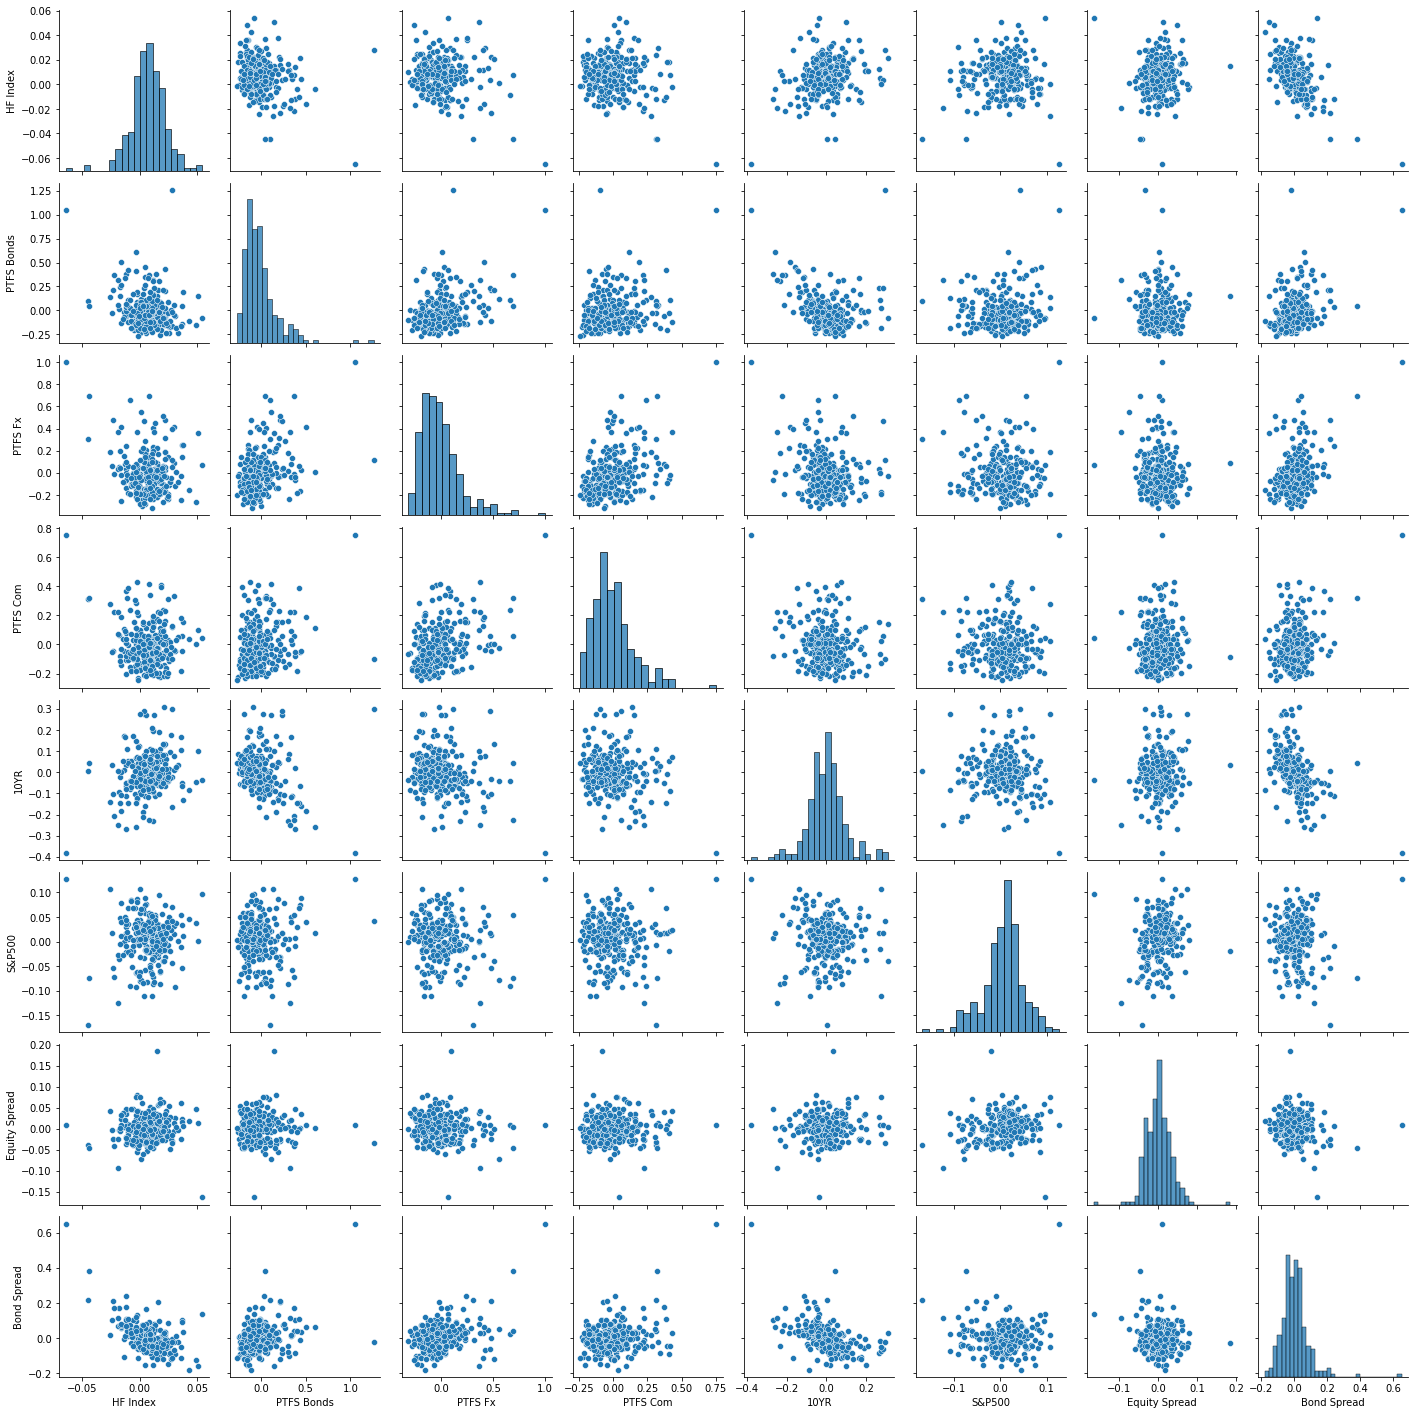

In [4]:
sns.pairplot(data)

<AxesSubplot:>

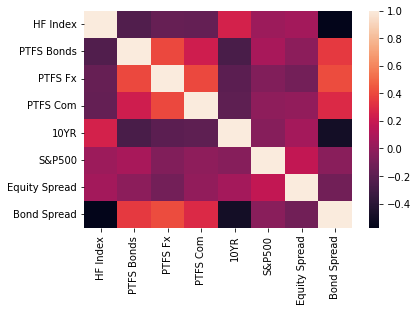

In [5]:
sns.heatmap(data.corr())

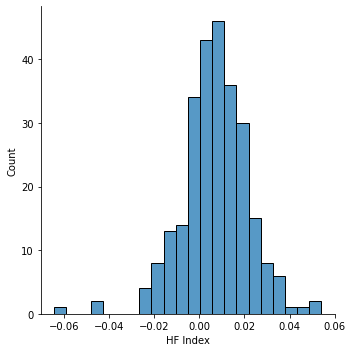

In [6]:
sns.displot(data['HF Index'])

In [7]:
# Divide the Set into 2000-2010 and 2011-2021 for training and testing

train = data.loc[[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]]
test = data.loc[[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]]

X_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,:1]

X_train


PTFS Bonds  PTFS Fx  PTFS Com      10YR    S&P500  Equity Spread  \
Year Month                                                                     
2000 1          0.1499   0.0933   -0.0835  0.035659 -0.020108       0.184306   
     2         -0.0800   0.0679    0.0412 -0.038922  0.096720      -0.163570   
     3          0.2121  -0.0270   -0.0733 -0.060748 -0.030796      -0.030122   
     4         -0.0559   0.0382   -0.1063  0.033167 -0.021915      -0.037483   
     5         -0.0371   0.0427   -0.0555  0.009631  0.023934       0.062273   
...                ...      ...       ...       ...       ...            ...   
2010 8          0.4521   0.0238   -0.0425 -0.159864  0.087551       0.035493   
     9         -0.1809   0.0070    0.0308  0.024291  0.036856       0.003387   
     10        -0.1568   0.0557    0.1601  0.039526 -0.002290       0.035929   
     11         0.0100  -0.1985    0.0262  0.068441  0.065300       0.012608   
     12         0.0049  -0.0454   -0.0140  0.174377  0.022646      -0.025708   

            Bond Spread  
Year Month               
2000 1        -0.028902  
     2         0.136905  
     3         0.204188  
     4         0.017391  
     5         0.076923  
...                 ...  
2010 8         0.034364  
     9         0.013289  
     10        0.032787  
     11       -0.038095  
     12       -0.115512  

[132 rows x 7 columns]

In [8]:
X_train.reset_index(drop=True, inplace=True)
X_train

,PTFS Bonds,PTFS Fx,PTFS Com,10YR,S&P500,Equity Spread,Bond Spread
0,0.1499,0.0933,-0.0835,0.035659,-0.020108,0.184306,-0.028902
1,-0.0800,0.0679,0.0412,-0.038922,0.096720,-0.163570,0.136905
2,0.2121,-0.0270,-0.0733,-0.060748,-0.030796,-0.030122,0.204188
3,-0.0559,0.0382,-0.1063,0.033167,-0.021915,-0.037483,0.017391
4,-0.0371,0.0427,-0.0555,0.009631,0.023934,0.062273,0.076923
...,...,...,...,...,...,...,...
127,0.4521,0.0238,-0.0425,-0.159864,0.087551,0.035493,0.034364
128,-0.1809,0.0070,0.0308,0.024291,0.036856,0.003387,0.013289
129,-0.1568,0.0557,0.1601,0.039526,-0.002290,0.035929,0.032787
130,0.0100,-0.1985,0.0262,0.068441,0.065300,0.012608,-0.038095


In [9]:
y_train.reset_index(drop=True, inplace=True)
y_train

,HF Index
0,0.014794
1,0.054167
2,0.015980
3,-0.012440
4,0.002077
...,...
127,0.004345
128,0.031407
129,0.021642
130,0.002816


In [10]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B)-Y) ** 2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y.add(h, axis=0)
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = (-alpha*gradient).add(B, axis=0)
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

In [11]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [12]:
type(cost_history)


list

In [13]:
y_ = pred(X_test,newB)

NameError: name 'pred' is not defined

In [14]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

[0.00979415]


In [15]:
coeff0 = pd.DataFrame(lm.intercept_, index = ['B0'], columns = ['Coefficient'])
coeff1 = pd.DataFrame(lm.coef_.T, X_train.columns,columns = ['Coefficient'])

coeff = coeff0.append(coeff1)
coeff

,Coefficient
B0,0.009794
PTFS Bonds,-0.007322
PTFS Fx,0.012396
PTFS Com,0.011292
10YR,-0.023569
S&P500,0.045142
Equity Spread,-0.026892
Bond Spread,-0.113990


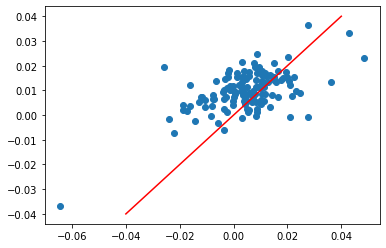

In [16]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.plot([-0.04,0.04], [-0.04,0.04], 'r-')

In [17]:
comp_df = pd.DataFrame(predictions, index = X_test.index, columns=['Predictions'])
comp_df['HF Index'] = y_test
comp_df['S&P500'] = X_test['S&P500']
comp_df.reset_index(inplace=True, drop=True)
comp_df

,Predictions,HF Index,S&P500
0,0.005706,0.003780,0.031957
1,0.013147,0.011288,-0.001047
2,0.011363,0.003019,0.028495
3,0.015577,0.014988,-0.013501
4,0.003691,-0.008161,-0.018258
...,...,...,...
127,0.002330,0.008800,-0.047569
128,0.013950,-0.006392,0.069144
129,0.015973,0.013811,-0.008334
130,0.007310,-0.012206,0.043613


In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))             #Mean Absolute Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))              #Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))    #Root Mean Squared Error

MAE: 0.009450243925764072
MSE: 0.0001454170366488905
RMSE: 0.012058898649913701


In [19]:
#r2_score(y_test,predictions)

In [20]:
#$1,000 invested t=0
pred_value = np.zeros(len(comp_df))
real_value = np.zeros(len(comp_df))
sp_value = np.zeros(len(comp_df))

pred_value[0] = 1000
real_value[0] = 1000
sp_value[0] = 1000

for i in range(1,len(comp_df)):
    pred_value[i] = pred_value[i-1]*(comp_df['Predictions'][i]+1)
    real_value[i] = real_value[i-1]*(comp_df['HF Index'][i]+1)
    sp_value[i] = sp_value[i-1]*(comp_df['S&P500'][i]+1)


In [21]:
values = pd.DataFrame(pred_value, columns=['Pred Value'])
values['Real Value'] = real_value
values['S&P500 Value'] = sp_value
values

,Pred Value,Real Value,S&P500 Value
0,1000.000000,1000.000000,1000.000000
1,1013.147416,1011.287825,998.952698
2,1024.659495,1014.340530,1027.418213
3,1040.620964,1029.543422,1013.547114
4,1044.461961,1021.141656,995.042269
...,...,...,...
127,3502.296762,1839.122774,3245.535782
128,3551.154789,1827.366490,3469.944696
129,3607.878982,1852.603629,3441.027109
130,3634.250958,1829.990026,3591.100194


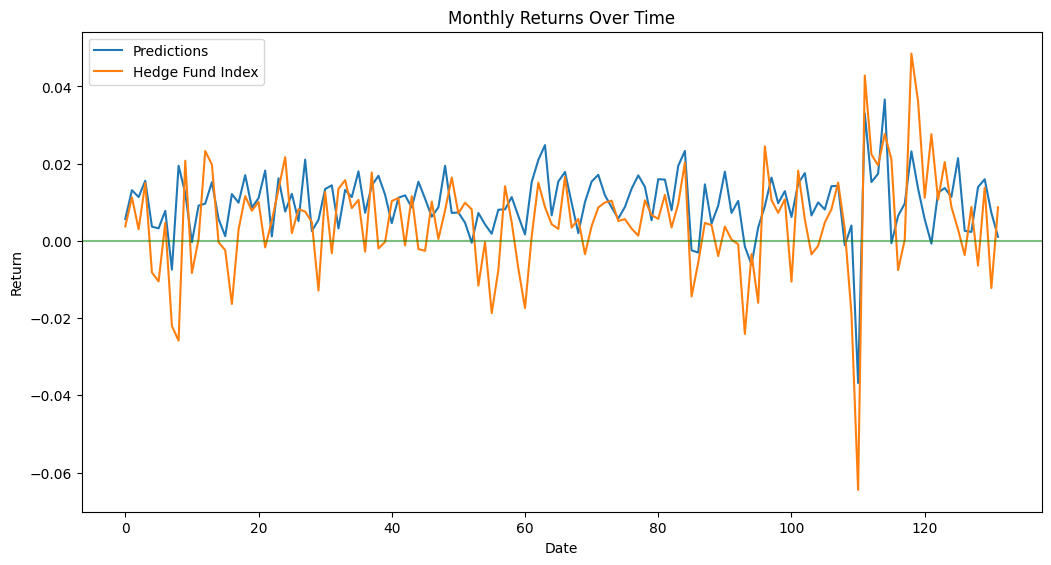

In [22]:
#Monthly Returns Plot
#Create Figure (empty canvas)
fig = plt.figure(figsize=(12,6), dpi=100)

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(comp_df[['Predictions', 'HF Index']])
axes.axhline(0, alpha=0.5, color='g')
axes.set_xlabel('Date')
axes.set_ylabel('Return')
axes.set_title('Monthly Returns Over Time')

plt.legend(['Predictions', 'Hedge Fund Index'])


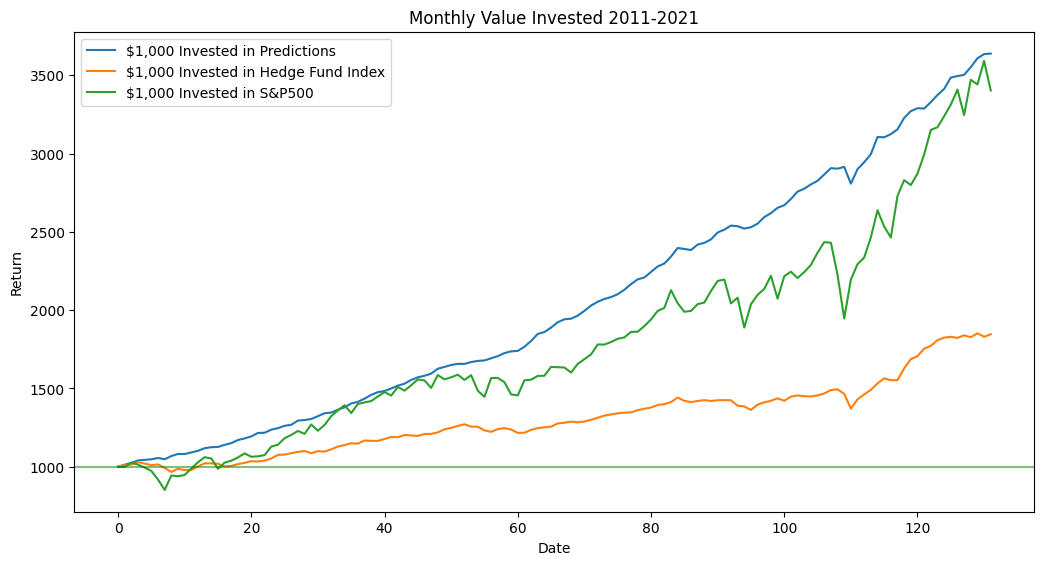

In [23]:
#Monthly Returns Plot
#Create Figure (empty canvas)
fig = plt.figure(figsize=(12,6), dpi=100)

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(values)
axes.axhline(1000, alpha=0.5, color='g')
axes.set_xlabel('Date')
axes.set_ylabel('Return')
axes.set_title('Monthly Value Invested 2011-2021')

plt.legend(['$1,000 Invested in Predictions', '$1,000 Invested in Hedge Fund Index', '$1,000 Invested in S&P500'])

In [24]:
pred_ret = (1+pred_value[131]/1000 - 1)**(1/11) -1
real_ret = (1+real_value[131]/1000 - 1)**(1/11) -1
sp_ret = (1+sp_value[131]/1000 - 1)**(1/11) -1

In [25]:
print('Ending Balance with Prediction Investment is: ${:,.2f}'.format(pred_value[131]))
print('Ending Balance with HF Index Investment is: ${:,.2f}'.format(real_value[131]))
print('Ending Balance with S&P Investment is: ${:,.2f}'.format(sp_value[131]))

Ending Balance with Prediction Investment is: $3,638.14
Ending Balance with HF Index Investment is: $1,845.93
Ending Balance with S&P Investment is: $3,402.26


In [26]:
print('Annualized Prediction Return is: {:,.2%}'.format(pred_ret))
print('Annualized HF Index Return is: {:,.2%}'.format(real_ret))
print('Annualized S&P500 Return is: {:,.2%}'.format(sp_ret))

Annualized Prediction Return is: 12.46%
Annualized HF Index Return is: 5.73%
Annualized S&P500 Return is: 11.77%
